# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Comment
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_json = requests.get(city_url).json()
        city_weather = json.dumps(response_json, indent = 4, sort_keys = True)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conduaga
Processing Record 2 of Set 1 | ambalangoda
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | luganville
Processing Record 9 of Set 1 | sokcho
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | red wing
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | fort bragg
Processing Record 17 of Set 1 | butig
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | qamdo
Processing Record 22 of Set 1 | adamstown
Processing Record 23 o

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.set_index("City")

# Show Record Count
print(city_data_df.count())


City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64


In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conduaga,8.8620,117.4893,25.30,79,64,1.35,PH,1708125896
1,ambalangoda,6.2355,80.0538,24.93,88,97,2.67,LK,1708125896
2,port alfred,-33.5906,26.8910,16.21,72,13,0.45,ZA,1708125896
3,san patricio,28.0170,-97.5169,18.05,94,100,3.80,US,1708125897
4,bethel,41.3712,-73.4140,2.19,50,0,2.57,US,1708125651


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_col="City_ID")
city_data_df2 = city_data_df.rename(columns = {"Lat" : "Latitude", "Lng" : "Longitude", "Max Temp" : "Temperature"})
# Display sample data
city_data_df2.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conduaga,8.8620,117.4893,25.30,79,64,1.35,PH,1708125896
1,ambalangoda,6.2355,80.0538,24.93,88,97,2.67,LK,1708125896
2,port alfred,-33.5906,26.8910,16.21,72,13,0.45,ZA,1708125896
3,san patricio,28.0170,-97.5169,18.05,94,100,3.80,US,1708125897
4,bethel,41.3712,-73.4140,2.19,50,0,2.57,US,1708125651


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

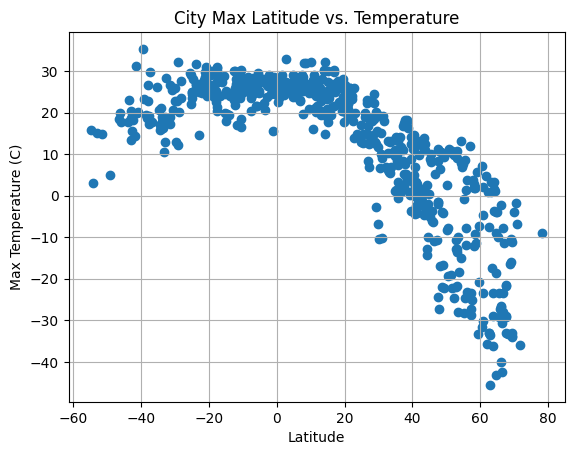

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df2["Latitude"], city_data_df2["Temperature"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

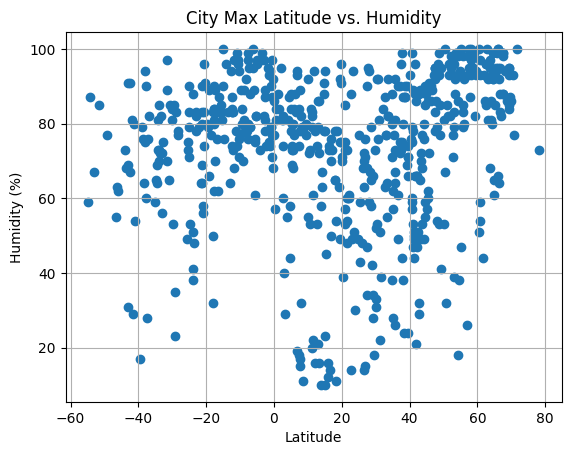

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df2["Latitude"], city_data_df2["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

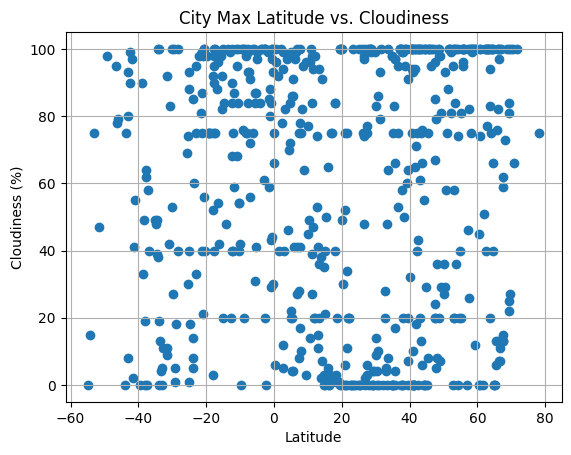

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df2["Latitude"], city_data_df2["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

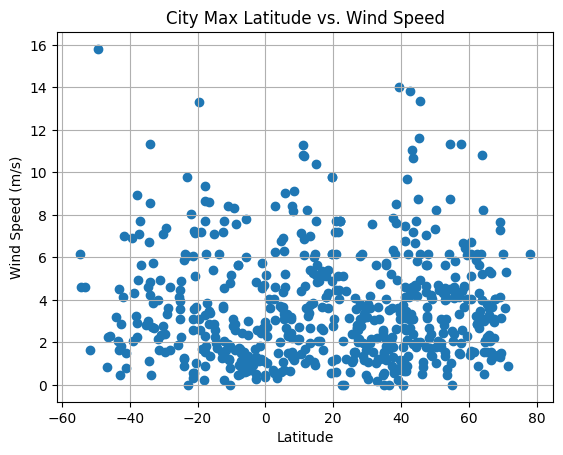

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df2["Latitude"], city_data_df2["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots

def lin_plotter(df, x_column, y_column):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_column], df[y_column])
    
    print(f"The r-value is {rvalue}.")
    print(f"p-value = {pvalue}")

    plt.scatter(df[x_column], df[y_column])

    # Incorporate the other graph properties
    plt.ylabel(y_column)
    plt.xlabel(x_column)

    
    plt.legend(["y = " + str(round(slope,2)) + "x + " + str((round(intercept,2)))])
    
    # fitting a linear regression line
    m, b = np.polyfit(df[x_column], df[y_column], 1)

    # adding the regression line to the scatter plot
    plt.plot(df[x_column], m*df[x_column] + b, color = "red")

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df2.loc[city_data_df2["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conduaga,8.8620,117.4893,25.30,79,64,1.35,PH,1708125896
1,ambalangoda,6.2355,80.0538,24.93,88,97,2.67,LK,1708125896
3,san patricio,28.0170,-97.5169,18.05,94,100,3.80,US,1708125897
4,bethel,41.3712,-73.4140,2.19,50,0,2.57,US,1708125651
8,sokcho,38.2083,128.5911,5.34,38,0,6.17,KR,1708125898


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df2.loc[city_data_df2["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,16.21,72,13,0.45,ZA,1708125896
5,papatowai,-46.5619,169.4708,18.46,55,95,0.85,NZ,1708125897
6,chonchi,-42.6128,-73.8092,15.56,91,90,1.84,CL,1708125898
7,luganville,-15.5333,167.1667,28.70,85,98,5.40,VU,1708125898
9,grytviken,-54.2811,-36.5092,3.02,87,15,4.62,GS,1708125898


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8528861204498865.
p-value = 1.1833222844254371e-116


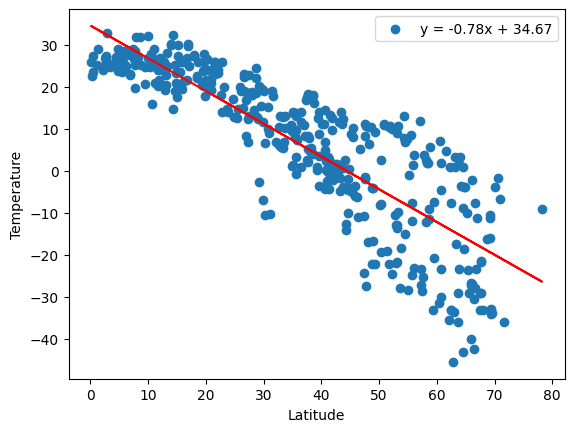

In [61]:
# Linear regression on Northern Hemisphere
lin_plotter(northern_hemi_df,"Latitude", "Temperature")

The r-value is 0.5238913982304398.
p-value = 1.0280970183333528e-14


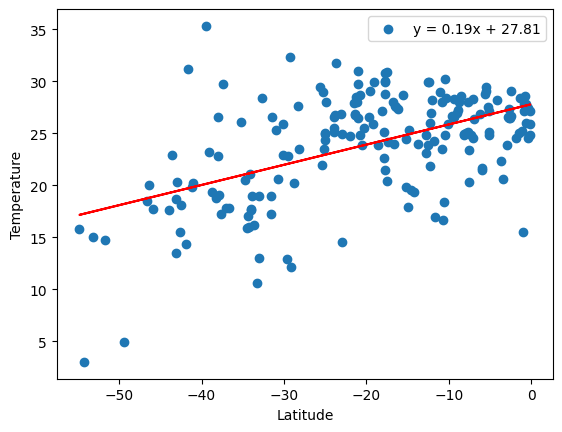

In [62]:
# Linear regression on Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In both cases, the temperature appears to decrease as the latitude moves away from zero. That is, the temperature is higher near Earth's equator.
The r-value for the northern hemisphere indicates that there is a fairly strong negative correlation between temperature and latitude. The low
p-value would indicate that this is not random chance. Similar conclusions may be drawn for the southern hemisphere data, except that the correlation is positive and not quite as strong.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3512543436538173.
p-value = 2.724428012887422e-13


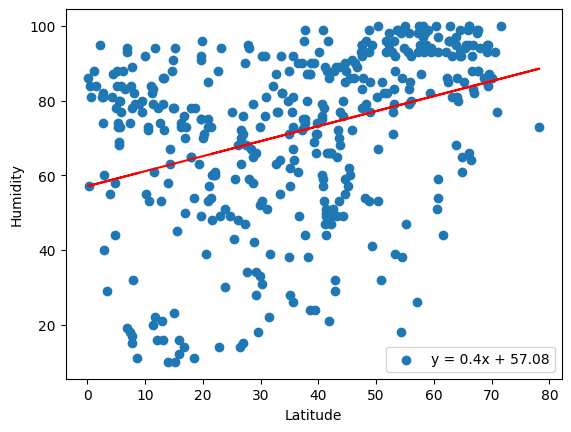

In [63]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Humidity")

The r-value is 0.3935016441506314.
p-value = 2.1250044046041626e-08


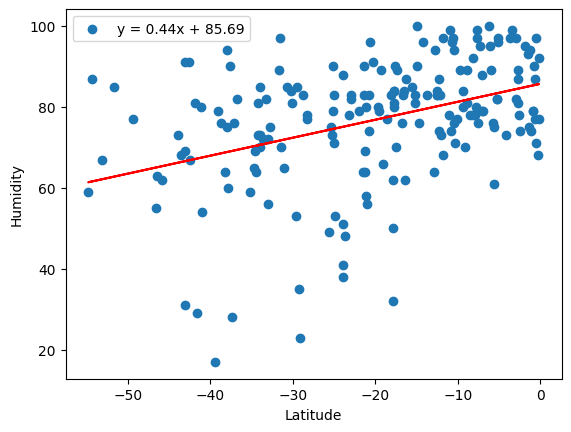

In [64]:
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-values indicate that there are positive correlations between latitude and humidity, both in the northern and southern hemispheres. The correlations are not very high, but they are not very high. It is noteworthy that despite this, the p-values indicate that the correlations
are not random chance.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.15183778063657843.
p-value = 0.002102110809159919


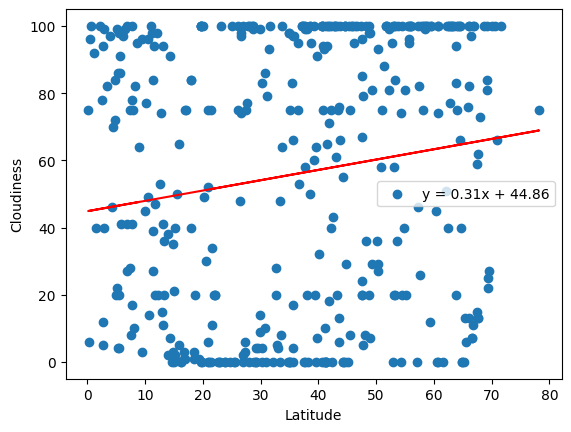

In [65]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Cloudiness")

The r-value is 0.33613831728364235.
p-value = 2.258412406786552e-06


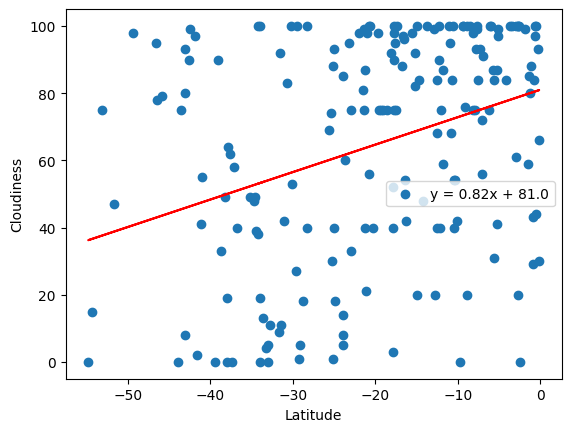

In [66]:
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness appears to increase with latitude in both the northern and southern hemispheres. However, this is more pronounced in the southern
hemisphere. The r-values don't indicate very strong correlations, but the correlation in the southern hemisphere is stronger than the correlation
in the northern hemisphere. The p-values indicate that these correlations are not a coincidence.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.010186974456667412.
p-value = 0.837462106892314


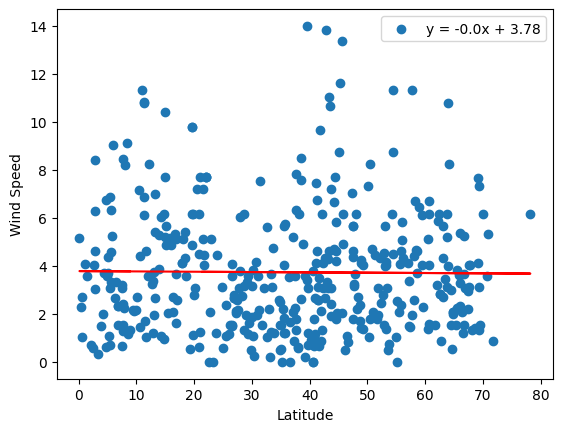

In [67]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Wind Speed")

The r-value is -0.23815878628205686.
p-value = 0.000966726580908983


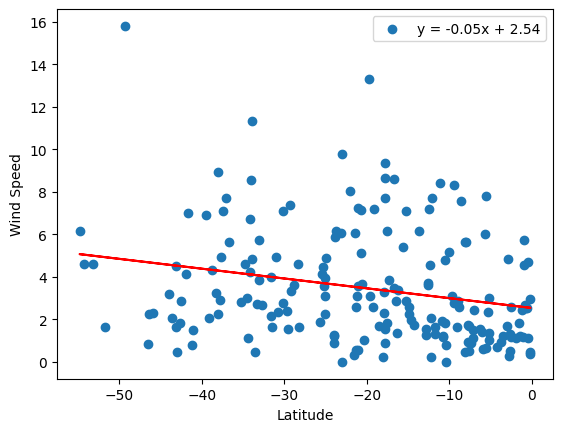

In [68]:
# Remember to print "The r-value is ..."
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Wind Speed")

There are weak negative correlations between latitude and wind speed in both hemispheres. The correlation is a good deal stronger in the southern hemisphere. The p-value for the southern hemisphere indicates that the correlation is not achieved by random chance. However, the p-value for the northern hemisphere is quite high. Between that and the fact that the r-value for the northern hemisphere is nearly zero, it would seem that there is no relationship between latitude and wind speed, at least based on the data for the northern hemisphere. More data for both hemispheres would need to be collected to reconcile these apparent differences.

**Discussion about the linear relationship:** YOUR RESPONSE HERE